# Amsterdam disrict classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown as Markdown, display

data = pd.read_csv("wijkbuurtkaart_for_eda.csv") 

In [2]:
#data.columns.to_list()

In [3]:
numeric_data = data.select_dtypes(include=[np.number])

In [37]:
corrMatrix = numeric_data.corrwith(numeric_data["gemiddelde_woningwaarde"]) # finding correlations
print("Between woningwaarde and the rest of the dataframe")
print("Correlation Coefficients Matrix")
print(corrMatrix) # printing correlations
print('\n')

Between woningwaarde and the rest of the dataframe
Correlation Coefficients Matrix
bevolkingsdichtheid_inwoners_per_km2                0.272796
aantal_inwoners                                     0.125418
geboortes_per_1000_inwoners                         0.054203
sterfte_totaal                                      0.020946
sterfte_relatief                                   -0.058751
gemiddelde_huishoudsgrootte                         0.316575
aantal_bedrijven_landbouw_bosbouw_visserij          0.080954
aantal_bedrijven_nijverheid_energie                -0.044578
aantal_bedrijven_handel_en_horeca                   0.194869
aantal_bedrijven_vervoer_informatie_communicatie    0.109740
aantal_bedrijven_financieel_onroerend_goed          0.376261
aantal_bedrijven_zakelijke_dienstverlening          0.400226
aantal_bedrijven_overheid_onderwijs_en_zorg         0.274423
aantal_bedrijven_cultuur_recreatie_overige          0.239113
gemiddelde_woningwaarde                             1.000000
pe

In [5]:
def print_highly_correlated(df, features, threshold_down=0.7, threshold_up=1.0):
    """Prints highly correlated features pairs in the data frame (helpful for feature engineering)"""
    corr_df = df[features].corr()
    correlated_features = np.where((np.abs(corr_df) < threshold_up) & (np.abs(corr_df) > threshold_down)) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold_down)
    else:
        for v, i, j in s_corr_list:
            cols = df[features].columns
            print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))

In [6]:
columns = [ column for column in numeric_data.columns if "_binnen_" not in column ]
#columns = [ column for column in columns if column not in ['aantal_inwoners', 'vrouwen', 'mannen', 'woningvoorraad'] ]
#print_highly_correlated(numeric_data, columns)

We need to remove highly corrilated columns

In [7]:
cor_matrix = numeric_data.corr().abs()
cor_matrix

,bevolkingsdichtheid_inwoners_per_km2,aantal_inwoners,mannen,vrouwen,geboorte_totaal,geboortes_per_1000_inwoners,sterfte_totaal,sterfte_relatief,aantal_huishoudens,gemiddelde_huishoudsgrootte,...,eenpersoonshuishoudens,huishoudens_zonder_kinderen,huishoudens_met_kinderen,westerse_migratieachtergrond,niet_westerse_migratieachtergrond,uit_marokko,uit_nederlandse_antillen_en_aruba,uit_suriname,uit_turkije,overige_nietwestersemigratieachtergrond
bevolkingsdichtheid_inwoners_per_km2,1.000000,0.549494,0.548911,0.547168,0.496254,0.119606,0.304389,0.020455,0.608807,0.001388,...,0.614052,0.634445,0.385220,0.628923,0.301929,0.256071,0.220290,0.154517,0.202409,0.339673
aantal_inwoners,0.549494,1.000000,0.997440,0.997594,0.913049,0.170853,0.639051,0.003325,0.963802,0.234007,...,0.852752,0.895980,0.929061,0.845469,0.819738,0.665091,0.564345,0.540918,0.639800,0.795285
mannen,0.548911,0.997440,1.000000,0.990095,0.908763,0.170166,0.629730,0.000869,0.958828,0.226206,...,0.850592,0.888905,0.921667,0.841395,0.826635,0.670888,0.570242,0.546225,0.646191,0.800378
vrouwen,0.547168,0.997594,0.990095,1.000000,0.912778,0.170541,0.645211,0.007709,0.963940,0.240137,...,0.850734,0.898548,0.931601,0.845437,0.808977,0.656139,0.555771,0.532983,0.630362,0.786575
geboorte_totaal,0.496254,0.913049,0.908763,0.912778,1.000000,0.314949,0.514708,0.030092,0.861798,0.237856,...,0.732638,0.836177,0.861798,0.758643,0.744631,0.664561,0.479084,0.432151,0.616352,0.682684
geboortes_per_1000_inwoners,0.119606,0.170853,0.170166,0.170541,0.314949,1.000000,0.062858,0.077932,0.153824,0.228540,...,0.114067,0.178836,0.163611,0.140450,0.123964,0.122814,0.075810,0.054570,0.105309,0.113793
sterfte_totaal,0.304389,0.639051,0.629730,0.645211,0.514708,0.062858,1.000000,0.325672,0.630148,0.106630,...,0.595915,0.532057,0.573947,0.488684,0.565827,0.434272,0.393989,0.400649,0.419453,0.567443
sterfte_relatief,0.020455,0.003325,0.000869,0.007709,0.030092,0.077932,0.325672,1.000000,0.005998,0.038052,...,0.017806,0.016436,0.002036,0.028763,0.020916,0.017034,0.005738,0.022196,0.013604,0.015592
aantal_huishoudens,0.608807,0.963802,0.958828,0.963940,0.861798,0.153824,0.630148,0.005998,1.000000,0.110103,...,0.955502,0.940218,0.817432,0.900467,0.722335,0.547720,0.539473,0.484914,0.522390,0.761880
gemiddelde_huishoudsgrootte,0.001388,0.234007,0.226206,0.240137,0.237856,0.228540,0.106630,0.038052,0.110103,1.000000,...,0.049338,0.107478,0.388121,0.060625,0.255982,0.252198,0.117179,0.178173,0.263916,0.151838


In [8]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
#print(to_drop)

print(numeric_data.shape)
numeric_data = numeric_data.drop(to_drop, axis=1)
print(numeric_data.shape)
numeric_data.head()

(471, 58)
(471, 37)


/var/folders/1q/nw56sv790t34hlk8f_j1dtxh0000gn/T/ipykernel_9784/1742481205.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,bevolkingsdichtheid_inwoners_per_km2,aantal_inwoners,geboortes_per_1000_inwoners,sterfte_totaal,sterfte_relatief,gemiddelde_huishoudsgrootte,aantal_bedrijven_landbouw_bosbouw_visserij,aantal_bedrijven_nijverheid_energie,aantal_bedrijven_handel_en_horeca,aantal_bedrijven_vervoer_informatie_communicatie,...,woningen_met_eigendom_onbekend,bouwjaarklasse_tot_2000,bouwjaarklasse_vanaf_2000,personen_0_tot_15_jaar,personen_15_tot_25_jaar,personen_65_jaar_en_ouder,niet_westerse_migratieachtergrond,uit_marokko,uit_nederlandse_antillen_en_aruba,overige_nietwestersemigratieachtergrond
0,18567,1115,5,5,4,1.4,0,15,210,35,...,7,749,23,44,144,100,211,0,11,144
1,7756,695,9,0,1,1.4,0,10,150,30,...,10,462,69,20,145,69,118,6,6,83
2,27483,1650,8,5,5,1.4,0,30,195,60,...,0,967,40,82,280,181,346,16,16,247
3,7360,370,5,0,3,1.5,0,10,90,25,...,0,257,5,22,62,25,40,3,0,29
4,8638,695,9,5,7,1.4,0,0,65,30,...,3,398,0,34,139,76,104,6,6,69


# Classification

First Let's import all we need

In [9]:
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### 1) Standardize the data in <code>X</code> 
Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.

In [10]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(numeric_data)

Y = LabelEncoder().fit_transform(data['stadsdeel'])
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### 2) Split the data into training and test data

In [11]:
print(Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
Y_test.shape

(471,)


(95,)

In [12]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(data.stadsdeel.unique()); 
    ax.yaxis.set_ticklabels(data.stadsdeel.unique())

# Support vector machine (SVM)

In [13]:
parameters = {'kernel':('linear','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC(cache_size=7000)

In [14]:
svm_cv = GridSearchCV(svm, parameters)
svm_cv.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(cache_size=7000),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'sigmoid')})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [15]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("the best model score: %.3f" % svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.001, 'kernel': 'linear'}
the best model score: 0.641


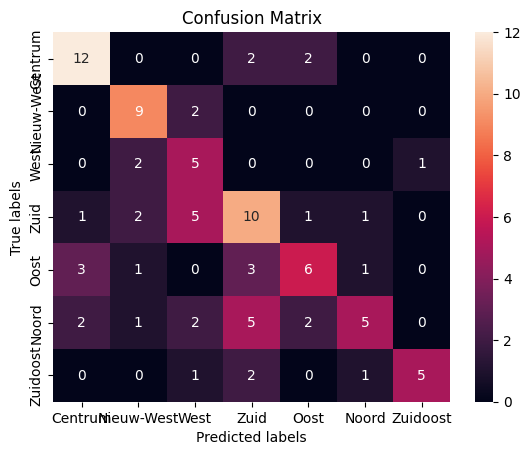

In [16]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# K Nearest Neighbor(KNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.53684211, 0.48421053, 0.48421053, 0.49473684, 0.51578947,
       0.49473684, 0.53684211, 0.57894737, 0.54736842])

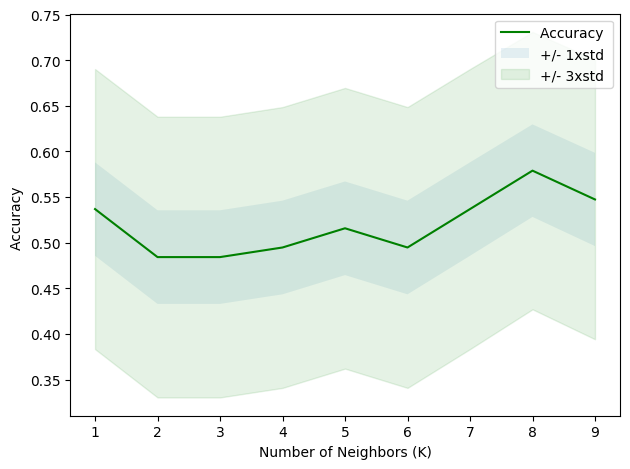

In [18]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [19]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [20]:
knn_cv = GridSearchCV(KNN, parameters)
knn_cv.fit(X_train, Y_train)
print("model score: %.3f" % knn_cv.score(X_test, Y_test))

model score: 0.537


In [21]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}
accuracy : 0.5744561403508772


# Decision tree 

In [22]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],#'auto', 
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [23]:
tree_cv = GridSearchCV(tree, parameters)
tree_cv.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.5024210526315789


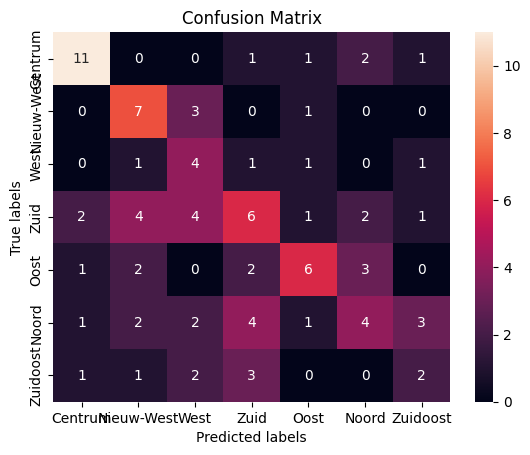

In [24]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Random forest

In [25]:
rfc = RandomForestClassifier(n_estimators=20, random_state = 4004)
rfc.fit(X_train, Y_train)
pred_test = rfc.predict(X_test)

In [26]:
rfc_score = rfc.score(X_test, Y_test)
print("Random Forest's accuracy is: {:.2%}".format(rfc_score))

Random Forest's accuracy is: 52.63%


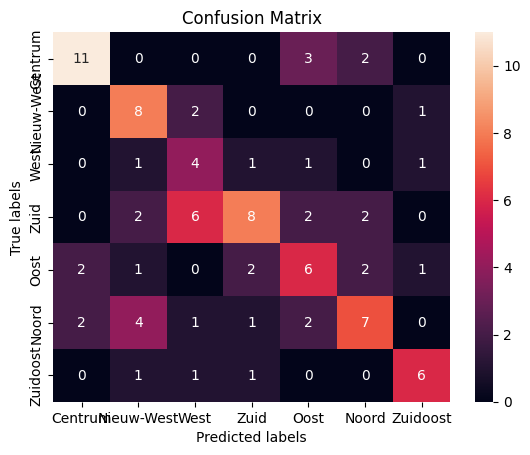

In [27]:
yhat = rfc.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [28]:
#pip install xgboost

# XGBoost

In [29]:
from xgboost import XGBClassifier
def XGBoost(X_train, X_test, y_train, y_test):
    xgb = XGBClassifier(n_estimators=100)
    xgb.fit(X_train, y_train)
    pred_test = xgb.predict(X_test)
    xgb_score = (pred_test == y_test).sum() / len(pred_test)*100
    print("Score is: %3.2f" % (xgb_score))
    print("Score is: %3.2f" % (xgb_score))
    return xgb, xgb_score

print("XGBoost")
xgb, xgb_score = XGBoost(X_train, X_test, Y_train, Y_test)

XGBoost
Score is: 54.74
Score is: 54.74


<AxesSubplot: xlabel='feature'>

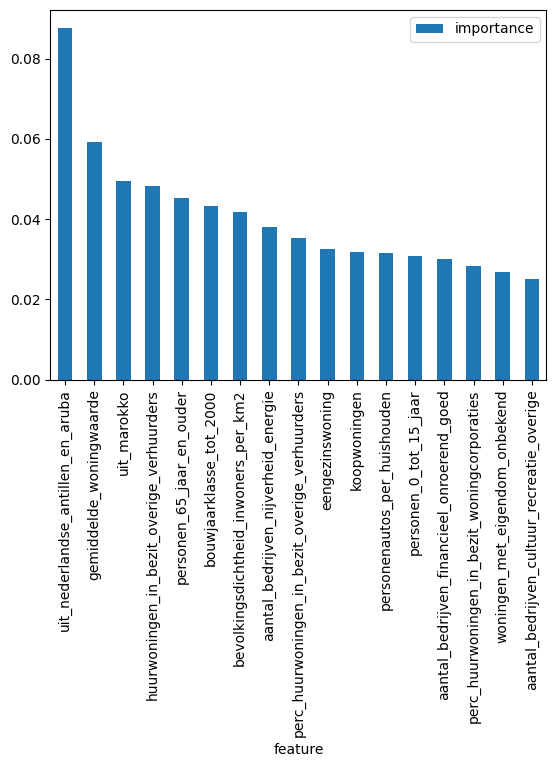

In [30]:
importances = pd.DataFrame({
    'feature': numeric_data.columns,
    'importance': xgb.feature_importances_
}).sort_values(by='importance', ascending=False).set_index('feature')
importances = importances[importances['importance'] > 0.025]
importances.plot.bar()

<AxesSubplot: xlabel='feature'>

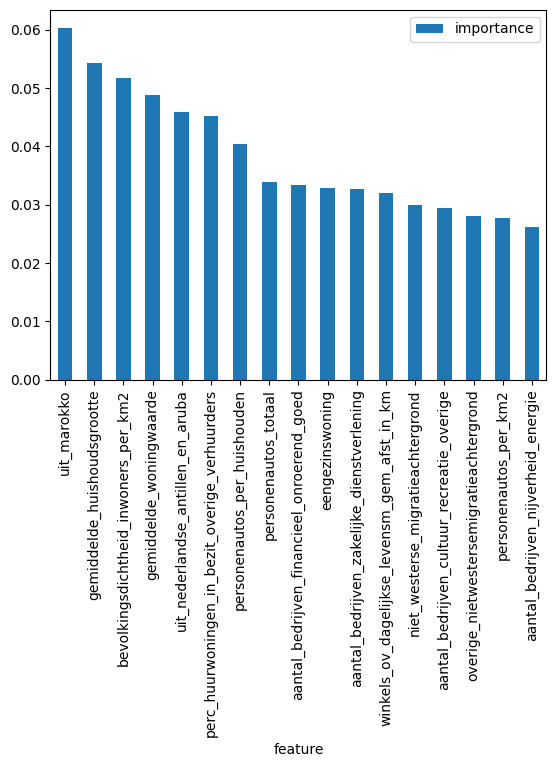

In [31]:
importances = pd.DataFrame({
    'feature': numeric_data.columns,
    'importance': rfc.feature_importances_
}).sort_values(by='importance', ascending=False).set_index('feature')
importances = importances[importances['importance'] > 0.025]
importances.plot.bar()

In [32]:
scores = {'SVM':svm_cv.best_score_, 
          'Decision Tree':tree_cv.best_score_, 
          'KNN':knn_cv.best_score_
         }
best_score = max(scores, key=scores.get)
print("The method performs best is %s with score: %.3f" % (best_score, scores[best_score]))


print("\nScores for other methods:")
for key, value in scores.items():
    print("For %s score is %.3f" % (key, value))

The method performs best is SVM with score: 0.641

Scores for other methods:
For SVM score is 0.641
For Decision Tree score is 0.502
For KNN score is 0.574


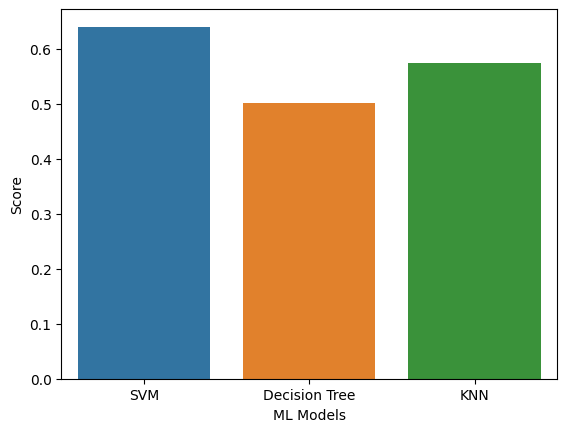

In [33]:
scores_data = pd.DataFrame({'Methods':list(scores.keys()),
                            'Score':list(scores.values())})
sns.barplot(x='Methods', y="Score", data=scores_data)
plt.xlabel("ML Models",fontsize=10)
plt.ylabel("Score",fontsize=10)
plt.show()

In [34]:
#sns.pairplot(data = data, x_vars = ['dogs_amount'], y_vars = columns)

In [35]:
#sns.relplot(data=data, x="personenautos_totaal", y="aantal_huishoudens", hue="Stadsdeel")